# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# блок загрузки библиотек

import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# код загрузки датасета

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/Users/vadimprimakov/Documents/Yandex_practicum/CSV/03_real_estate.csv', sep = '\t')

#изучим общую информацию по предоставленным данным
#построим общую гистограмму для всех столбцов таблицы
display(data.head())
data.info()
print('\nЧисло дубликатов:', data.duplicated().sum())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выявленные ошибки в данных**

    1) Пропуски в столбцах
        - ceiling_height — высота потолков (м) - 9195 пропусков
        - floors_total — всего этажей в доме - 86 пропусков
        - living_area — жилая площадь в квадратных метрах (м²) - 1903 пропуска
        - is_apartment — апартаменты (булев тип) - 20 924 пропуска
        - kitchen_area — площадь кухни в квадратных метрах (м²) - 2278 пропусков
        - balcony — число балконов - 11519 пропусков
        - locality_name — название населённого пункта - 49 пропусков
        - airports_nearest  — расстояние до ближайшего аэропорта в метрах (м) - 5542 пропуска
        - cityCenters_nearest — расстояние до центра города (м) - 5519 пропусков
        - parks_around3000 — число парков в радиусе 3 км - 5518 пропусков
        - parks_nearest — расстояние до ближайшего парка (м) - 15620 пропусков
        - ponds_around3000 — число водоёмов в радиусе 3 км - 5518 пропусков
        - ponds_nearest — расстояние до ближайшего водоёма (м) - 14589 пропусков
        - days_exposition — сколько дней было размещено объявление (от публикации до снятия) - 
        3181 пропуск
    2) Неправильный тип данных
        - first_day_exposition — дата публикации - должен быть тип datetime
        - floors_total — всего этажей в доме - не может быть дробных значений
        - is_apartment — апартаменты (булев тип) - текущий тип object
        - balcony — число балконов - текущий тип float64
        - parks_around3000 — число парков в радиусе 3 км - не может быть дробных значений
        - ponds_around3000 — число водоёмов в радиусе 3 км - не может быть дробных значений
        - days_exposition — сколько дней было размещено объявление (от публикации до снятия) - 
        не может быть дробных значений

### Предобработка данных

#### Поиск и изучение пропущенных значения в столбцах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

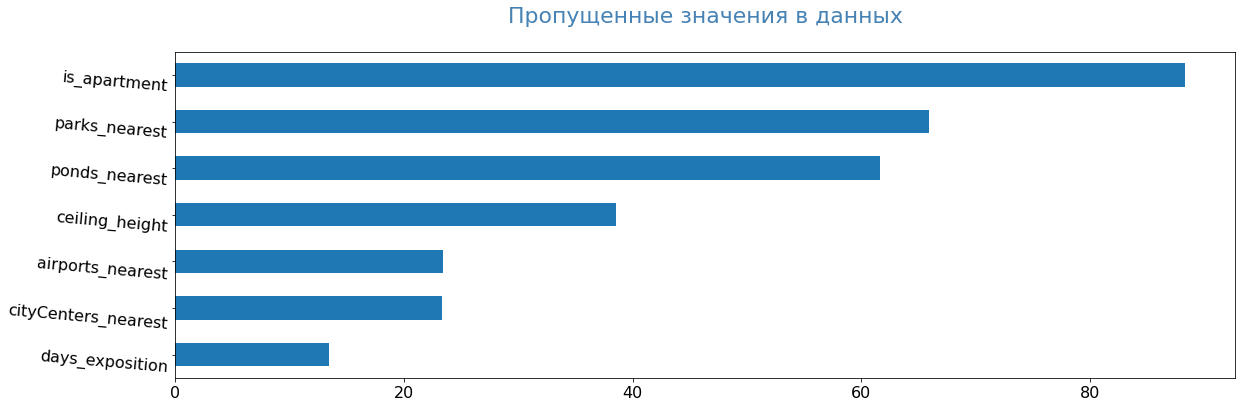

In [5]:
# изучим столбцы, с пропущенными значениями
# для визуализации проверки на пропущенных значения используем рекомендуемый код функции pass_value_barh

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропущенные значения в данных' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')
        

data['last_price'].value_counts()
data.dropna(subset=['last_price'], inplace=True)  


data['ceiling_height'].value_counts()


data['floors_total'].value_counts()
data.dropna(subset=['floors_total'], inplace=True)


data['living_area'].value_counts()
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)


data['kitchen_area'].value_counts()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)


data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(value=0)


data['locality_name'].value_counts()
data.dropna(subset=['locality_name'], inplace=True)


data['parks_around3000'].value_counts()
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)


data['ponds_around3000'].value_counts()
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)


data.info()
data.isnull().sum()        
pass_value_barh(data)

##### Причины, которые могли привести к пропускам в данных

ceiling_height — высота потолков (м) - пропущенные значения в ceiling_height присутствуют, отмечаем, что есть показатели выше нормы, которые, возможно, связаны с неправильно поставленной запятой, исправим ситуацию в пункте 2.4, после того как исправим выдающиеся значения

floors_total — всего этажей в доме - пропущенные значения присутствуют - их количество невелико, удаление этих строк некритично 

living_area — жилая площадь в квадратных метрах (м²) - не стоит избавляться от пропусков в этой колонке, так как в этом случае мы теряем много записей - пропущенные значения в living_area присутствуют, посчитаем отношение среднего числа квадратных метров жилой площади к 
среднему числу общей площади, чтобы на основе этого показателя заполнить пропуски

is_apartment — апартаменты (булев тип) - в описании проекта указан тип данных для данного столбца, приведем данных к правильному формату согласно инструкции, необходимо заменить пропущенные значения на False, данная проблема будет решена в пункте 2.2

kitchen_area — площадь кухни в квадратных метрах (м²) - не стоит избавляться от пропусков в этой колонке, так как в этом случае мы теряем много записей - пропущенные значения в kitchen_area присутствуют, посчитаем отношение среднего числа квадратных метров площади кухни к 
среднему числу общей площади, чтобы на основе этого показателя заполнить пропуски

balcony — число балконов - пропущенные значения в balcony присутствуют, примем в расчет, что отсутствие данных говорит нам о том, что балкона в квартире нет

locality_name — название населённого пункта - пропущенные значения в locality_name присутствуют - их количество невелико, удаление этих строк критично не изменит ход исследования

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) - пропущенные значения в этих столбцах присутствуют, их недостаток не повлияет на ход исследования

cityCenters_nearest — расстояние до центра города (м) - пропущенные значения в этих столбцах присутствуют, их недостаток не повлияет на ход исследования

parks_nearest — расстояние до ближайшего парка (м) - пропущенные значения в этих столбцах присутствуют, их недостаток не повлияет на ход исследования

ponds_nearest — расстояние до ближайшего водоёма (м) - пропущенные значения в этих столбцах присутствуют, их недостаток не повлияет на ход исследования

parks_around3000 — число парков в радиусе 3 км - пропущенные значения в parks_around3000 присутствуют, заменим пропущенные значения на 0, отсутствие данных говорит нам о том, что парка рядом нет

ponds_around3000 — число водоёмов в радиусе 3 км - пропущенные значения в ponds_around3000 присутствуют, заменим пропущенные значения на 0, отсутствие данных говорит нам о том, что пруда рядом нет

days_exposition — сколько дней было размещено объявление (от публикации до снятия) - пропуски в столбце говорят нам, что квартиры еще не проданы, неверно терять столь важный признак, следовательно оставляем пропуски

floor — этаж - пропущенные значения в floor отсутствуют, явных выбросов не обнаружено

studio — квартира-студия (булев тип) - пропущенные значения в studio отсутствуют, ошибок не обнаружено

open_plan — свободная планировка (булев тип) - пропущенные значения в open_plan отсутствуют, ошибок не обнаружено


#### Типы данных в каждом столбце

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

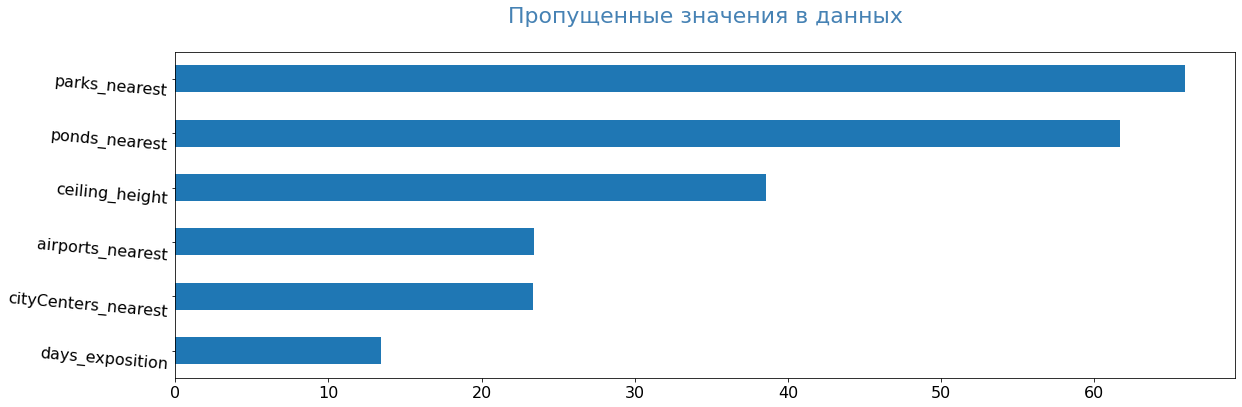

In [6]:
# исправим неправильный тип данных в выявленных столбцах

data['first_day_exposition'].value_counts()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')


data['floors_total'].value_counts()
data['floors_total'] = data['floors_total'].astype(int)


data['is_apartment'].value_counts()
data['is_apartment'] = data['is_apartment'].fillna(value=False)


data['balcony'].value_counts()
data['balcony'] = data['balcony'].astype(int)


data['parks_around3000'].value_counts()
data['parks_around3000'] = data['parks_around3000'].astype(int)


data['ponds_around3000'].value_counts()
data['ponds_around3000'] = data['ponds_around3000'].astype(int)


data.info()
pass_value_barh(data)

##### Почему нужно произвести замену типа данных

first_day_exposition — дата публикации изменили тип данных на datetime, в соотвествующем формате, конкретное время не указано, точный день, месяц и год понадобятся для последующего решения задач.

floors_total — всего этажей в доме, исправим тип данных на целочисленный, количество этажей в доме не может быть дробным

is_apartment — апартаменты (булев тип) - в описании проекта указан тип данных для данного столбца, приведем данных к правильному формату согласно инструкции, необходимо заменить пропущенные значения на False.

balcony — число балконов - изменим тип данных на целочисленный, количество балконов не может быть дробным

parks_around3000 — число парков в радиусе 3 км - изменим тип данных на целочисленный, количество парков не может быть дробным

ponds_around3000 — число водоёмов в радиусе 3 км - изменим тип данных на целочисленный, количество прудов не может быть дробным

days_exposition — сколько дней было размещено объявление (от публикации до снятия) - изменим тип данных на целочисленный, количество дней размещения не может быть дробным, однако изменить тип данных не представляется возможным из-за пропусков в столбце, которые говорят нам, что квартиры еще не проданы

#### Изучение уникальных значений и устранение неявных дубликатов

In [7]:
# устраним неявные дубликаты в столбцах

data['locality_name'].value_counts()
sorted(data.locality_name.unique()) #- выражение для сортировки столбца в алфавитном порядке для проверки
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].replace({r'(\b)поселок городского типа(\b)':r'\1поселок\2'}, regex=True)


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

##### Обзор неявных дубликатов

При заполнении столбца locality_name — название населённого пункта, были выявлены неявные дубликаты, из-за замены букв **е** и **ё**, а также использования сокращенного варианта написания **поселок городского типа**, неявные дубликаты после преобработки исправлены.

#### Поиск и устранение редких и выбивающихся значений

In [8]:
# изучим уникальные значения после первых этапов преобработки, выявим и устраним редкие и выбивающиеся значений


data['ceiling_height'].value_counts()
data['ceiling_height'] = data['ceiling_height'].replace({20.0:2.0, 22.6:2.26, 24.0:2.4, 25.0:2.5, 26.0:2.6, 27.0:2.7, 27.5:2.75, 32.0:3.2, 100.0:10.0})
data[data['ceiling_height'] > 5].sort_values('ceiling_height').tail(50)
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

#подготовим функцию quartile_clean, которая поможет нам избавляться от выбросов для нужного столбца
def quartile_clean(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    data_clean = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return data_clean

print ('до I удаления', data.shape[0])

list_anomalies = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
                  'floors_total']
for column in list_anomalies:
    data[column] = quartile_clean(data, column)
    data[column].fillna(0, inplace=True)

print ('после I удаления', data.shape[0])
    
data = data.query('total_area != 0')
    
    
# проверим существуют ли такие строки, в которых значение суммы жилой площади и кухни больше 
#общей площади с коэффициентом 0.9, так как квартира не обходится без коридоров, сан.узлов, балконов

print ('до II удаления', data.shape[0])

data.query('total_area*0.9 < living_area + kitchen_area')
data = data.query('total_area*0.9 >= living_area + kitchen_area')

print ('после II удаления', data.shape[0])



до I удаления 23565
после I удаления 23565
до II удаления 22326
после II удаления 21840


##### Обзор редких и выдающихся значений

Пропущенные значения в ceiling_height присутствуют, отмечаем, что есть показатели выше нормы, исправим данные значения методом replace, считаем, что имела место быть ошибка при вводе данных. После исправления ошибочных значений разобьем значения из столбца ceiling_height в новый столбец ceiling_category по категориям низкий, стандартный, высокий и очень высокий потолок, для каждой категории найдем свое медианное значение и заполним пропуски, в данных получается очень много выдающихся значений, которые мешают исследованию, принято решение заменить на медианные значения без категоризации.


После всех фильтраций остались редкие значения и аномалии в столбцах total_area — общая площадь квартиры в квадратных метрах (м²), last_price — цена на момент снятия с публикации, 
living_area — жилая площадь в квадратных метрах (м²) и kitchen_area — площадь кухни в квадратных метрах (м²). C использование функции quartile_clean для определения межквартильный размах из исходных данных были отброшены значения на основе 1.5 размаха. Редкие значения исключены из исследования.

Проверка выражения total_area*0.9 <= (living_area + kitchen_area) показала, что есть 1654 такие строки, их появление в данных сложно объяснить, но такие "нереальные" квартиры будут мешать исследованию, поэтому такие строки подлежат искллючению из исследования.


In [9]:
# check
data['locality_name'].nunique()

326

In [10]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21840 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21840 non-null  int64         
 1   last_price            21840 non-null  float64       
 2   total_area            21840 non-null  float64       
 3   first_day_exposition  21840 non-null  datetime64[ns]
 4   rooms                 21840 non-null  float64       
 5   ceiling_height        21840 non-null  float64       
 6   floors_total          21840 non-null  float64       
 7   living_area           21840 non-null  float64       
 8   floor                 21840 non-null  float64       
 9   is_apartment          21840 non-null  bool          
 10  studio                21840 non-null  bool          
 11  open_plan             21840 non-null  bool          
 12  kitchen_area          21840 non-null  float64       
 13  balcony         

In [42]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,840.00","21,840.00","21,840.00","21,840.00","21,840.00","21,840.00","21,840.00","21,840.00","21,840.00"
min,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,5.00,114.20,2.85,509.00,11.87,76.50,19.43,16.00,29.00


In [12]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0001, .5, .90, .976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0001,0.00,13.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.5,2.00,50.30,2.65,59.00,"4,300,000.00",29.50,8.70,4.00,9.00
0.9,3.00,82.30,2.70,287.00,"7,850,000.00",48.83,13.55,11.00,22.00
0.976,4.00,101.30,2.80,436.00,"10,200,000.00",61.00,16.60,15.00,25.00


In [13]:
# check

cut_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]

data['cut_total_area'] = pd.cut(data['total_area'],
                       bins=cut_bins,
                       labels=False)

data['cut_total_area'].value_counts()

0    10868
1    10392
2      580
Name: cut_total_area, dtype: int64

In [14]:
# check
data[data['cut_total_area'] == 4].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cut_total_area


### Посчитайте и добавьте в таблицу новые столбцы

In [15]:
# Добавим столбец цена одного квадратного метра (square_meter_price), изменим его тип на целочисленный
data['square_meter_price'] = (data['last_price'] / data['total_area']).astype(int)

# Добавим столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) (weekday_publication)
data['weekday_publication'] = data['first_day_exposition'].dt.weekday


# Добавим столбец месяц публикации объявления (month_publication)
data['month_publication'] = data['first_day_exposition'].dt.month


# Добавим столбец год публикации объявления (year_publication)
data['year_publication'] = data['first_day_exposition'].dt.year


# Добавим столбец тип этажа квартиры (значения — «первый», «последний», «другой») (floor_type)
def generate_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(generate_floor_type, axis=1)


# Добавим столбец с расстоянием до центра города в километрах (переведите из м в км и округлите до целых значений) (city_center_distance)
data['city_center_distance'] = (data['cityCenters_nearest'] / 1000).fillna(value=0).astype(int)


#data.info()
#data.isnull().sum()
data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,cut_total_area,square_meter_price,weekday_publication,month_publication,year_publication,floor_type,city_center_distance
0,0,20,0.00,108.00,2019-03-07,3.00,2.70,16.00,51.00,8.00,...,2,755.00,0.00,2,0,3,3,2019,другой,16
1,1,7,3350000.00,40.40,2018-12-04,1.00,2.65,11.00,18.60,1.00,...,0,NaN,81.00,0,82920,1,12,2018,первый,18
2,2,10,5196000.00,56.00,2015-08-20,2.00,2.65,5.00,34.30,4.00,...,2,574.00,0.00,1,92785,3,8,2015,другой,13
3,4,2,10000000.00,100.00,2018-06-19,2.00,0.00,14.00,32.00,13.00,...,1,48.00,121.00,1,100000,1,6,2018,другой,8
4,5,10,2890000.00,30.40,2018-09-10,1.00,2.65,12.00,14.40,5.00,...,0,NaN,55.00,0,95065,0,9,2018,другой,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21835,23693,9,4600000.00,62.40,2016-08-05,3.00,2.60,9.00,40.00,8.00,...,1,675.00,239.00,1,73717,4,8,2016,другой,34
21836,23695,14,3100000.00,59.00,2018-01-15,3.00,2.65,5.00,38.00,4.00,...,0,NaN,45.00,1,52542,0,1,2018,другой,0
21837,23696,18,2500000.00,56.70,2018-02-11,2.00,2.65,3.00,29.70,1.00,...,0,NaN,0.00,1,44091,6,2,2018,первый,0
21838,23697,13,11475000.00,76.75,2017-03-28,2.00,0.00,17.00,43.83,12.00,...,3,196.00,0.00,1,149511,1,3,2017,другой,10


### Проведите исследовательский анализ данных

#### Изучаем основные параметры объектов

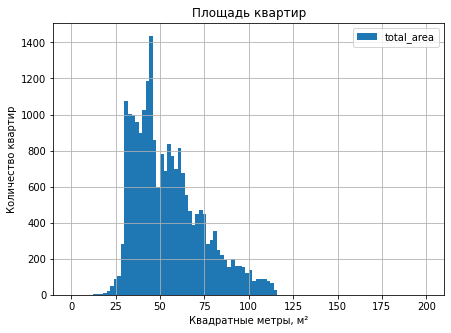

Наибольшие по площади варианты:
5978    114.20
19021   114.20
1170    114.20
4657    114.20
20477   114.20
5853    114.10
10602   114.00
1400    114.00
3157    114.00
9701    114.00
Name: total_area, dtype: float64


count   21840.00
mean       54.51
std        19.30
min        13.00
25%        39.70
50%        50.30
75%        65.70
max       114.20
Name: total_area, dtype: float64

In [16]:
# Total_area — общая площадь квартиры в квадратных метрах (м²)
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры, м²')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
data['total_area'].describe()

##### Общая площадь квартиры в квадратных метрах (м²)
В представленной выборке значительное число квартир составляет менее 100 квадратных метров, средняя площадь квартиры - 55 квадратных метров. Из подборки убраны откровенно большие и редкие варианты с площадью более 400 квадратных метров. Самая маленькая квартира в представленных объявлениях равна 13 квадратным метрам

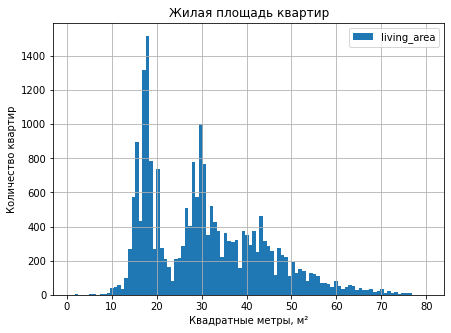

Наибольшие по жилой площади варианты:
16618   76.50
7239    76.40
9361    76.40
9789    76.30
2776    76.30
14621   76.20
1566    76.20
20120   76.10
14240   76.00
8783    76.00
Name: living_area, dtype: float64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cut_total_area,square_meter_price,weekday_publication,month_publication,year_publication,city_center_distance
count,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,...,7052.00,21779.00,8040.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00,21779.00
mean,9.81,4600930.77,54.36,1.95,2.36,10.75,30.82,4.94,8.99,0.60,...,495.23,0.56,526.10,101.79,0.53,87982.43,2.57,6.40,2017.39,10.75
std,5.60,2336863.00,19.12,0.89,0.80,6.55,12.99,3.80,3.40,0.95,...,343.01,0.85,277.05,118.69,0.55,34224.47,1.79,3.49,1.02,9.59
min,0.00,0.00,13.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,...,1.00,0.00,13.00,0.00,0.00,0.00,0.00,1.00,2014.00,0.00
25%,6.00,3150000.00,39.65,1.00,2.50,5.00,18.50,2.00,6.70,0.00,...,290.00,0.00,305.00,11.00,0.00,71236.00,1.00,3.00,2017.00,1.00
50%,9.00,4300000.00,50.20,2.00,2.65,9.00,29.60,4.00,8.70,0.00,...,458.00,0.00,511.50,59.00,1.00,91228.00,3.00,6.00,2017.00,11.00
75%,14.00,5850000.00,65.50,3.00,2.65,16.00,39.98,7.00,11.00,1.00,...,617.00,1.00,734.00,147.00,1.00,108198.50,4.00,10.00,2018.00,15.00
max,50.00,11866860.00,114.20,5.00,2.85,29.00,76.50,16.00,19.43,5.00,...,3190.00,3.00,1344.00,509.00,2.00,312240.00,6.00,12.00,2019.00,65.00


In [17]:
# Living_area — жилая площадь в квадратных метрах (м²)
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (1,80))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры, м²')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))
data[data['living_area'] != 0].describe()

##### Жилая площадь в квадратных метрах (м²)
В представленной выборке значительное число квартир имеют жилую площадь от 15 до 30 квадратных метров, среднее значение жилой площади квартиры - 30 квадратных метров. Из подборки убраны откровенно большие и редкие варианты с жилой площадью более 100 квадратных метров. Минимальное значение жилой площади квартиры в представленных объявлениях равна 13 квадратным метрам.

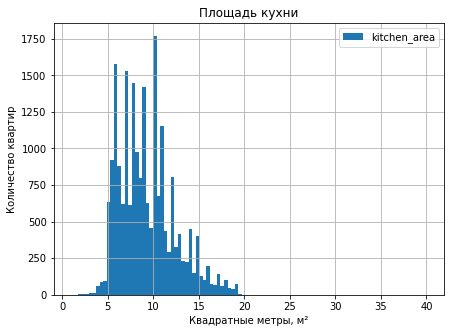

Наибольшие варианты площади кухни:
16505   19.43
8286    19.42
8901    19.40
15365   19.40
12138   19.39
6343    19.35
260     19.30
9048    19.30
17051   19.30
12024   19.30
Name: kitchen_area, dtype: float64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cut_total_area,square_meter_price,weekday_publication,month_publication,year_publication,city_center_distance
count,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,...,6754.00,21160.00,7706.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00,21160.00
mean,9.74,4588292.09,53.68,1.94,2.38,10.73,30.56,4.93,9.29,0.60,...,492.56,0.54,528.95,101.46,0.51,88395.34,2.57,6.40,2017.39,10.80
std,5.57,2269200.10,18.67,0.89,0.78,6.54,12.95,3.79,3.04,0.95,...,336.03,0.84,276.39,118.18,0.54,33195.19,1.79,3.49,1.02,9.63
min,0.00,0.00,13.00,0.00,0.00,0.00,0.00,0.00,1.30,0.00,...,1.00,0.00,13.00,0.00,0.00,0.00,0.00,1.00,2014.00,0.00
25%,6.00,3199750.00,39.10,1.00,2.50,5.00,18.40,2.00,7.00,0.00,...,292.00,0.00,312.00,11.00,0.00,71715.25,1.00,3.00,2017.00,1.00
50%,9.00,4299000.00,50.00,2.00,2.65,9.00,29.30,4.00,9.00,0.00,...,458.00,0.00,515.00,59.00,0.00,91250.00,3.00,6.00,2017.00,11.00
75%,14.00,5800000.00,64.40,3.00,2.65,16.00,39.50,7.00,11.00,1.00,...,616.00,1.00,736.00,147.00,1.00,108035.25,4.00,10.00,2018.00,15.00
max,39.00,11866860.00,114.20,5.00,2.85,29.00,76.50,16.00,19.43,5.00,...,3190.00,3.00,1344.00,509.00,2.00,312240.00,6.00,12.00,2019.00,65.00


In [18]:
# Kitchen_area — площадь кухни в квадратных метрах (м²)
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (1,40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры, м²')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты площади кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
data[data['kitchen_area'] != 0].describe()

##### Площадь кухни в квадратных метрах (м²)
В представленной выборке значительное число квартир имеют площадь кухни от 5 до 15 квадратных метров, среднее значение площади кухни в квартирах - 9 квадратных метров. Из подборки исключены несколько откровенно больших  и редких вариантов с площадью кухни более 75 квадратных метров. Минимальное значение площади кухни в квартире в представленных объявлениях равна 2 квадратным метрам.

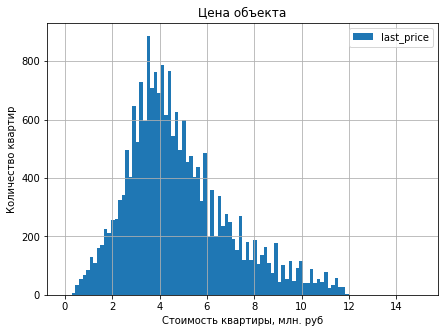

Самые дорогие квартиры:
3165    11.87
21860   11.86
12437   11.85
20193   11.81
22326   11.80
14422   11.80
4973    11.80
9407    11.80
21547   11.80
3642    11.80
Name: last_price, dtype: float64


In [19]:
# Last_price — цена на момент снятия с публикации
data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (0.000001,15))
plt.title('Цена объекта')
plt.xlabel('Стоимость квартиры, млн. руб')
plt.ylabel('Количество квартир')
plt.show()
print('Самые дорогие квартиры:')
print(data['last_price'].sort_values(ascending=False).head(10))

##### Цена на момент снятия с публикации (млн. руб)
В представленной выборке стоимость квартир на момент закрытия объявления варьируется от 2 до 8 миллионов рублей, среднее значение цены объекта - 4,7 млн. руб. Из подборки исключены несколько откровенно больших и редких вариантов с ценой более 150 миллионов рублей. Минимальная цена на момент закрытия объявления равна 12 тысяч рублей, что может говорить о том, что возможно перепутаны типы объявлений: аренда и продажа.

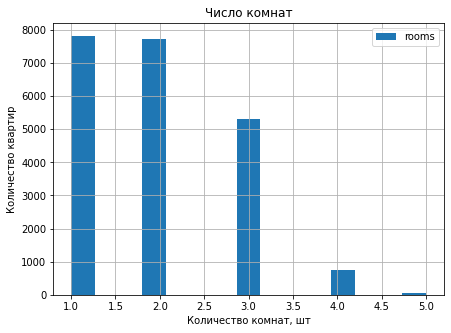

Общее число комнат:
1617    5.00
23305   5.00
9419    5.00
15010   5.00
9277    5.00
7515    5.00
9701    5.00
15999   5.00
542     5.00
19533   5.00
Name: rooms, dtype: float64


count   21840.00
mean        1.95
std         0.89
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64

In [20]:
# Rooms — число комнат

data.plot(y = 'rooms', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (1,5))
plt.title('Число комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Количество квартир')
plt.show()
print('Общее число комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))
data['rooms'].describe()

##### Число комнат (шт)
В выборке представлены в основном одно-, двух и трехкомнатные квартиры, после удаление явных выбросов среднее значение числа комнат - 2. В подборке остались четырех- и пятикомнатные варианты, их сущетсвование возможно и не вызывает сомнений. Преимущеcтвенно в объявлениях представленны однокомнатные квартиры.

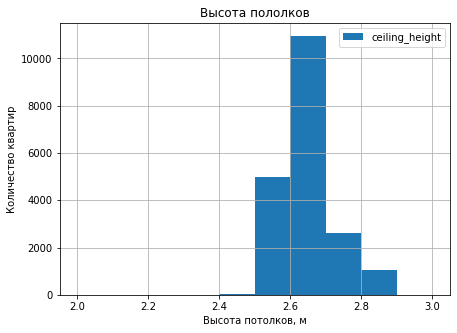

Самые высокие потолки:
6076    2.85
11767   2.85
6006    2.85
1912    2.85
17027   2.85
12837   2.85
18683   2.85
11703   2.85
18691   2.85
10462   2.85
Name: ceiling_height, dtype: float64


count   21840.00
mean        2.36
std         0.80
min         0.00
25%         2.50
50%         2.65
75%         2.65
max         2.85
Name: ceiling_height, dtype: float64

In [21]:
# Сeiling_height — высота потолков (м)

data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, grid=True, figsize = (7,5), range = (2,3))
plt.title('Высота пололков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие потолки:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
data['ceiling_height'].describe()

##### Высота потолков (м)
В выборке представлены квартиры с высотой потолков от 2,6 до 2,8 метров, после удаление явных выбросов среднее значение высоты потолка - 2,68 м. В подборке есть квартиры с высокими потолками - 3,2 м, их существование возможно и не вызывает сомнений,но в дальнейшем исследовании они принимать участие не будут. Минимальная высота потолков - 2,2 метра.

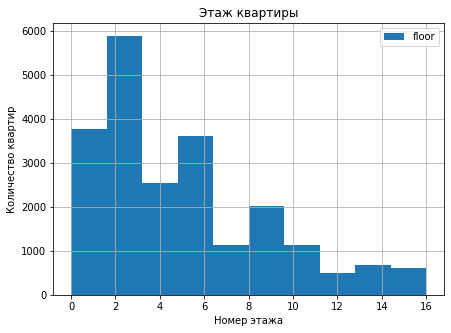

Самые большой номер этажа:
17405   16.00
15162   16.00
20947   16.00
22313   16.00
15465   16.00
15460   16.00
4926    16.00
15350   16.00
20941   16.00
15269   16.00
Name: floor, dtype: float64


count   21840.00
mean        4.94
std         3.80
min         0.00
25%         2.00
50%         4.00
75%         7.00
max        16.00
Name: floor, dtype: float64

In [22]:
# Floor — этаж

data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, figsize = (7,5))
plt.title('Этаж квартиры')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')
plt.show()
print('Самые большой номер этажа:')
print(data['floor'].sort_values(ascending=False).head(10))
data['floor'].describe()

##### Этаж
В выборке представлены квартиры в основном с 1 по 9 этаж, после удаление явных выбросов среднее значение этажа - 5. В подборке есть высокие квартиры от 25 этажа и выше, их сущетсвование возможно и не вызывает сомнений. Большинство квартир расположены на 1 этаже.

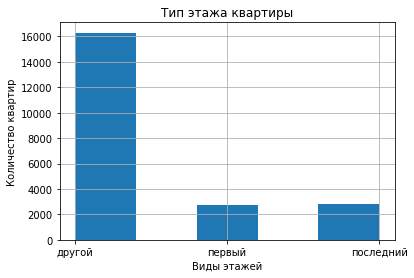

другой       16295
последний     2816
первый        2729
Name: floor_type, dtype: int64


In [23]:
# Floor_type — тип этажа квартиры («первый», «последний», «другой»)
plt.hist(data['floor_type'], bins = 5)
plt.title('Тип этажа квартиры')
plt.xlabel('Виды этажей')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()
print(data['floor_type'].value_counts()) 


##### Тип этажа квартиры
В выборке представлены 2729 квартир на первом этаже, 2987 квартир на последнем этаже и 16124 квартир на других этажах.  

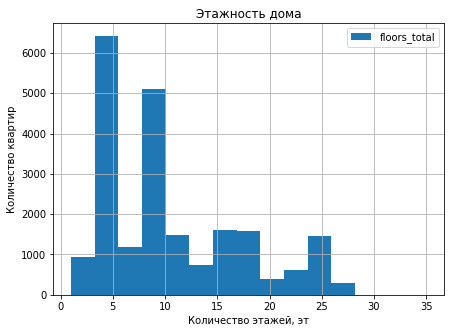

Самые высокие дома:
3797    29.00
23544   28.00
7711    28.00
16984   28.00
4558    28.00
7073    28.00
14719   28.00
12950   28.00
324     28.00
14018   28.00
Name: floors_total, dtype: float64


count   21840.00
mean       10.74
std         6.55
min         0.00
25%         5.00
50%         9.00
75%        16.00
max        29.00
Name: floors_total, dtype: float64

In [24]:
# Floors_total — всего этажей в доме

data.plot(y = 'floors_total', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (1,35))
plt.title('Этажность дома')
plt.xlabel('Количество этажей, эт')
plt.ylabel('Количество квартир')
plt.show()
print('Самые высокие дома:')
print(data['floors_total'].sort_values(ascending=False).head(10))
data['floors_total'].describe()

##### Всего этажей в доме (эт)
В выборке представлены в основном многоэтажные дома, преимущественно от 5 до 9 этажей, среднее значение этажности домов - 11 этажей. В подборке представлены многоэтажные дома от 35 этажей и выше, их сущетсвование возможно и не вызывает сомнений. Также в выборке присутствуют и одноэтажные строения.

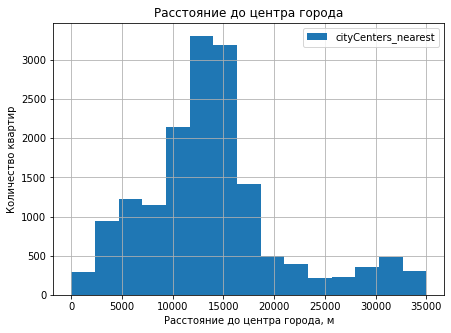

Самые большое расстояние до центра города:
9640    65968.00
5340    65952.00
577     65764.00
20746   65105.00
5218    64857.00
18884   62706.00
2974    62454.00
16569   61495.00
23123   60223.00
4441    59626.00
Name: cityCenters_nearest, dtype: float64


count   16552.00
mean    14663.57
std      8525.30
min       208.00
25%     10128.50
50%     13365.00
75%     16526.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

In [25]:
# СityCenters_nearest — расстояние до центра города в километрах

data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (0,35000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Количество квартир')
plt.show()
print('Самые большое расстояние до центра города:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))
data['cityCenters_nearest'].describe()


##### Расстояние до центра города (м)
В выборке представлены дома, в основном либо в непосредственной близости от центра города, либо на расстоянии не более 15 километров от центра, среднее значение - 14 километров. В подборке также представлены дома находящиеся от центра на расстоянии более 60 километров.

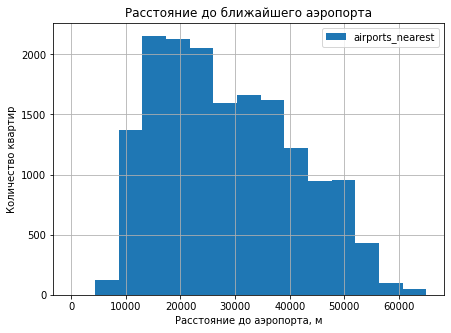

Самые большое расстояние до аэропорта:
9640    84869.00
5340    84853.00
577     84665.00
20746   84006.00
5218    83758.00
18884   81607.00
2974    81355.00
4441    78527.00
939     75646.00
376     73827.00
Name: airports_nearest, dtype: float64


count   16534.00
mean    28906.90
std     12851.59
min         0.00
25%     18309.00
50%     27088.00
75%     37434.00
max     84869.00
Name: airports_nearest, dtype: float64

In [26]:
# Airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

data.plot(y = 'airports_nearest', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (1,65000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('Количество квартир')
plt.show()
print('Самые большое расстояние до аэропорта:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))
data['airports_nearest'].describe()


##### Расстояние до ближайшего аэропорта (м)
В выборке представлены дома, в основном находящиеся на расстоянии от 10 до 40 километров от ближайшего аэропорта, средняя удаленность от аэропорта - 29 километров. В подборке также представлены дома находящиеся от аэропорта на расстоянии более 70 километров, а также и в непосредственной близости от него.

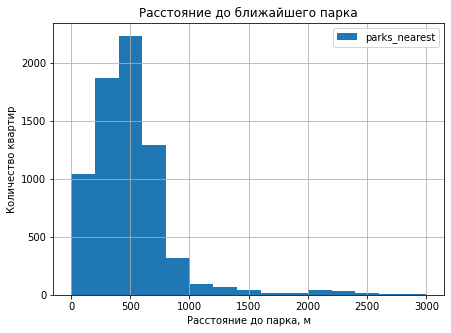

Самые большое расстояние до парка:
19430   3190.00
10959   3190.00
1590    3064.00
23080   2984.00
2659    2905.00
1860    2888.00
7855    2880.00
3865    2847.00
22003   2768.00
7316    2747.00
Name: parks_nearest, dtype: float64


count   7083.00
mean     494.94
std      342.45
min        1.00
25%      290.00
50%      458.00
75%      617.00
max     3190.00
Name: parks_nearest, dtype: float64

In [27]:
# Parks_nearest — расстояние до ближайшего парка в метрах (м)

data.plot(y = 'parks_nearest', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (1,3000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество квартир')
plt.show()
print('Самые большое расстояние до парка:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))
data['parks_nearest'].describe()


##### Расстояние до ближайшего парка (м)
В выборке представлены дома, в основном находящиеся на расстоянии от 300 до 1000 метров от ближайшего парка, средняя удаленность от парка - 500 метров. В подборке также представлены дома находящиеся от парков на расстоянии более 3 километров, а также и в непосредственной близости от него.

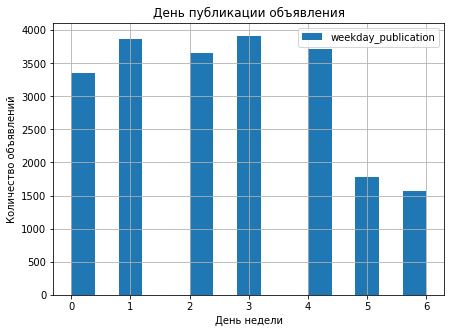

3    3913
1    3870
4    3711
2    3649
0    3345
5    1778
6    1574
Name: weekday_publication, dtype: int64

In [28]:
# Weekday_publication — день публикации объявления

data.plot(y = 'weekday_publication', kind = 'hist', bins = 15, grid=True, figsize = (7,5), range = (0,6))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')

plt.show()

data['weekday_publication'].value_counts()


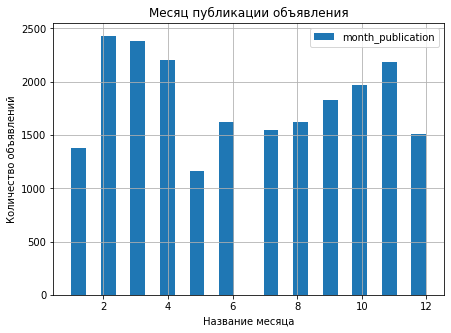

2     2429
3     2385
4     2203
11    2182
10    1969
9     1827
6     1626
8     1618
7     1550
12    1507
1     1382
5     1162
Name: month_publication, dtype: int64

In [29]:
# month_publication — месяц публикации объявления

data.plot(y = 'month_publication', kind = 'hist', bins = 24, grid=True, figsize = (7,5), range = (1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Название месяца')
plt.ylabel('Количество объявлений')

plt.show()

data['month_publication'].value_counts()

##### День и месяц публикации объявления 
В выборке прослеживается тенденция, что объявления в основном публикуются по будним дням, самый активный день - четверг. На выходных количество открытых объявлений значительно меньше, в два раза меньше, чем по рабочим дням.

Самый активный месяц в году, когда объявления публикуются  - февраль, реже всего открывались объявления в мае. Однако, если высчитать общее количество опубликованных объявлений по временам года, мы получим следующие значения в порядке убывания - осень, весна, зима, лето. Точного объяснения такой закономерности на данный момент не возможно предоставить, но нельзя отрицать факт того, что летом публикация новых объявлений о продаже квартир случаются реже.

### Проведите исследовательский анализ данных

In [31]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21840 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21840 non-null  int64         
 1   last_price            21840 non-null  float64       
 2   total_area            21840 non-null  float64       
 3   first_day_exposition  21840 non-null  datetime64[ns]
 4   rooms                 21840 non-null  float64       
 5   ceiling_height        21840 non-null  float64       
 6   floors_total          21840 non-null  float64       
 7   living_area           21840 non-null  float64       
 8   floor                 21840 non-null  float64       
 9   is_apartment          21840 non-null  bool          
 10  studio                21840 non-null  bool          
 11  open_plan             21840 non-null  bool          
 12  kitchen_area          21840 non-null  float64       
 13  balcony         

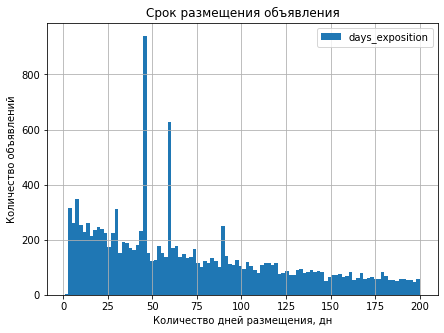

count   17575.00
mean      126.38
std       119.93
min         1.00
25%        40.00
50%        83.00
75%       180.00
max       509.00
Name: days_exposition, dtype: float64

In [32]:
# Изучите, как быстро продавались квартиры (столбец days_exposition). 
# Этот параметр показывает, сколько дней было размещено каждое объявление.

data_isna = data[(data['days_exposition'] < 1100) | (data['days_exposition'].isna()) ] #сохраним новое значение data без выбросов по столбцу days_exposition

data_isna.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (7,5), range = (1,200))
plt.title('Срок размещения объявления')
plt.xlabel('Количество дней размещения, дн')
plt.ylabel('Количество объявлений')
plt.show()

data[data['days_exposition']!=0]['days_exposition'].describe()


#### Выводы по данным о количестве дней от публикации до снятия
На полученных графиках отчетливо видно несколько пиков, которые появляются на 3, 45, 60 и 90 день. Являются ли данные показатели выбросами сказать достоверно не возможно. Из данных показателей можно сформировать запрос к составителю данных, для проверки на корректность. Возможно, выдающиеся значения появляются автоматически(робот заблокировал объявление за нарушение, прошел срок бесплатного размещения).


Исследуя гистограмму продаж и диаграмму размаха можно видеть, что **среднее время продажи квартиры 126 дней**. **Медианное время продажи - 83 дня**. Большая часть значений лежит за диапазоном 440 дней (1.5 межквартального размаха, добавленного к третьему квартилю). Исключим из исследования данные значения. (Метод describe описывает уже новые значения после удаления). Быстрой продажей можно назвать срок до **45 дней** (Q1) и меньше. Необычно долгой продажей - **260 дней** (9 месяцев - Q3+1,5*IQR) и дольше.


Без дополнительной информации от менеджера данных можно сделать вывод, что квартиры продаются за срок около **92 дня**. Большее число квартир, продаются всего за срок от нескольких дней после публикации до 3 месяцев. А также есть варианты, которые выставлялись более 12 месяцев. Точно сказать нельзя, связано ли снятие объявления с публикации после сверхдлительного срока в связи с удачной продажей нельзя.

### Задача 2. Факторы влияющие на общую (полную) стоимость объекта

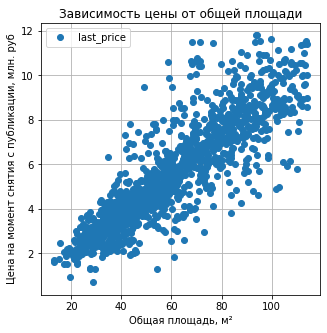

Корреляция цены и общей площади: 

            last_price  total_area
last_price        1.00        0.98
total_area        0.98        1.00 



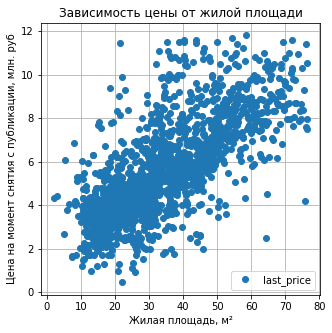

Корреляция цены и жилой площади: 

             last_price  living_area
last_price         1.00         0.97
living_area        0.97         1.00 



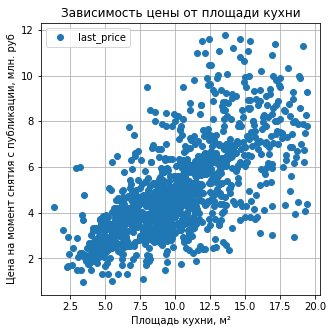

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area          1.00        0.88
last_price            0.88        1.00 



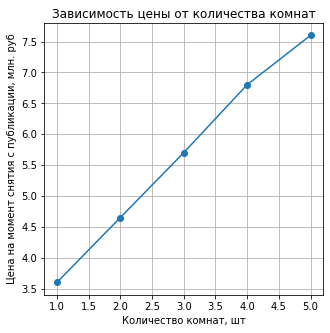

Корреляция цены и количества комнат: 

            last_price  rooms
last_price        1.00   0.36
rooms             0.36   1.00 



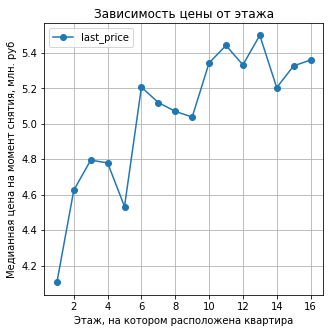

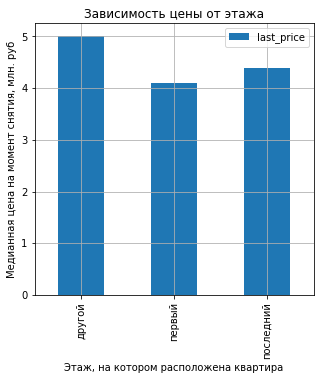

Корреляция цены и этажа: 

            floor  last_price
floor        1.00        0.22
last_price   0.22        1.00 



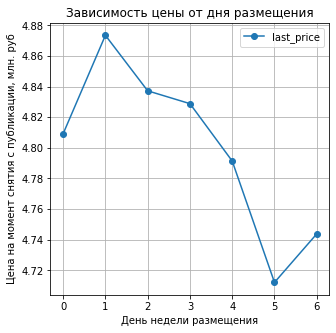

Корреляция цены и дня размещения: 

                     last_price  weekday_publication
last_price                 1.00                 0.31
weekday_publication        0.31                 1.00 



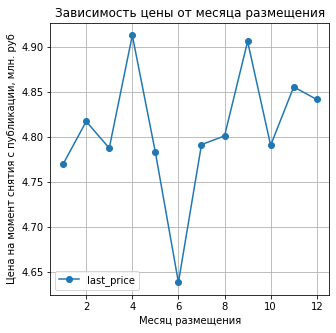

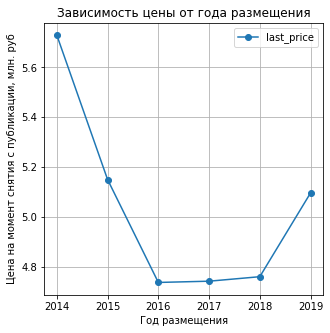

In [33]:
''' Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год). ''' 


# Зависимость цены от общей площади
(
    data.query('last_price != 0 and total_area != 0').pivot_table(index='total_area', values='last_price')
    .plot(style='o', figsize=(5, 5), grid=True)
)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.query('total_area != 0').pivot_table(index='rooms', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от жилой площади
(
    data.query('last_price != 0 and living_area != 0').pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.query('total_area != 0').pivot_table(index='rooms', values=['living_area', 'last_price']).corr(),'\n')

# Зависимость цены от площади кухни
(
    data.query('last_price != 0 and kitchen_area != 0').pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.query('total_area != 0').pivot_table(index='rooms', values=['kitchen_area', 'last_price']).corr(),'\n')


# Зависимость цены от количества комнат

(data
     .query('last_price != 0 and rooms != 0')
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', style='o-', grid=True, figsize=(5,5))
)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.query('total_area != 0').pivot_table(index='kitchen_area', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
(data
    .query('last_price != 0 and floor != 0')
    .pivot_table(index='floor', values='last_price')
    .plot(style='o-', grid=True, figsize=(5, 5))
)
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж, на котором расположена квартира')
plt.ylabel('Медианная цена на момент снятия, млн. руб')
plt.show()

(data
    .query('last_price != 0')
    .pivot_table(index='floor_type', values='last_price')
    .plot(kind='bar', style='o-', grid=True, figsize=(5, 5))
)
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж, на котором расположена квартира')
plt.ylabel('Медианная цена на момент снятия, млн. руб')
plt.show()

print('Корреляция цены и этажа:','\n')
print(data.query('total_area != 0').pivot_table(index='days_exposition', values=['floor', 'last_price']).corr(),'\n')

# Зависимость цены от дня размещения (день недели)

(data
    .query('last_price != 0')
    .pivot_table(index='weekday_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(5, 5))
)
plt.title('Зависимость цены от дня размещения')
plt.xlabel('День недели размещения')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()

print('Корреляция цены и дня размещения:','\n')
print(data.query('total_area != 0').pivot_table(index='floor', values=['weekday_publication', 'last_price']).corr(),'\n')

# Зависимость цены от месяца размещения (месяц)

(data
    .query('last_price != 0') 
    .pivot_table(index='month_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(5, 5))
)
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()


# Зависимость цены от года размещения (год)

(data
    .query('last_price != 0') 
    .pivot_table(index='year_publication', values='last_price')
    .plot(style='o-', grid=True, figsize=(5, 5))
)
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год размещения')
plt.ylabel('Цена на момент снятия с публикации, млн. руб')
plt.show()



#### Выводы по графикам зависимости цены от разных факторов
После изучения различных факторов можно сделать вывод, цена зависит от:


**общей площади** - коэффициент корреляции положительный **0,98**;

**жилой площади** - коэффициент корреляции положительный **0,97**;

**площади кухни** - коэффициент корреляции положительный **0.88**.


Цена в меньше степени зависит от таких показателей как,

**количества комнат** - коэффициент корреляции положительный **0,36**;

**этаж, на котором расположена квартира**  - коэффициент корреляции положительный **0,22**;

**даты размещения** - коэффициент корреляции положительный 
 - день - **0,31**;

 
Высокая положительная корреляция площади и цены, говорит нам о том, что чем больше площадь, тем выше стоимость. Цена будет выше у той квартиры, у которой полезная площадь выше, что очевидно, чем больше жилой площади в квартире, тем она удобнее. Дополнительно, появляется гипотеза на проверку: правда ли, что если площадь кухни будет больше, то и цена на квартиру в целом будет меньше.

График зависимости цены от количества комнат показывает нам прямую зависимость, что с увеличением количества комнат стоимость жилья растет, этот результат ожидаем, однако зависимость ниже, чем у площади. Дополнительно можно оценить и проверить гипотезу, что с увеличением количества квадратных метров, стоимость квадратного метра падает.

Этаж, на котором находится квартира влияет на ее стоимость - в среднем квартиры на 1-м этаже стоят дешевле. Выше ценится последний этаж. В целом можно сказать, что стоимость квартир, расположенных не на 1-м и не на последнем этаже выше.

Интересные показатели получились на графике зависимости дня недели и цены, дороже всего стоят квартиры, опубликованные во вторник, дешевле всего - в выходные, это может вырасти в гипотезу о том, что по будням в основном публикуются коммерческие объявления, а на выходных от частных лиц. Вторник выбран не случайно, у покупателей будет больше времени ознакомится с предложениями с начала недели.


А вот февраль, апрель, сентябрь и ноябрь показывают себя не с лучшей стороны для покупателя, средняя цена объектов снятых с публикации объявлений выше в целом по году. В целом эти месяцы попадают на середины кварталов. Самый выгодным для покупателя по значению цены можно считать июнь, летом спрос на недвижимость падает.


Относительно года, можно отметить, что квартиры дешевеют с 2014-2015 гг, вероятно, это свявзано с прошедшим кризисом. В 2019 году цены стали восстанавливаться. Однако, корреляция между двумя последними показателями отсутствует, связь между ними очень слабая.



### Задача 3. Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [34]:
# Для ответа на вопрос составим сводную таблицу locality_name_top_ten

locality_name_top_ten = round(data.pivot_table(index='locality_name',values='square_meter_price',aggfunc=('count','mean')),2)
locality_name_top_ten.sort_values(by='count',ascending=False).head(10)



,count,mean
locality_name,,
Санкт-Петербург,14214.00,98444.86
поселок Мурино,521.00,85137.76
поселок Шушары,430.00,78326.65
Всеволожск,382.00,66981.61
Пушкин,343.00,97175.74
Колпино,332.00,75041.19
поселок Парголово,324.00,90273.11
Гатчина,299.00,68398.48
деревня Кудрово,287.00,92143.23


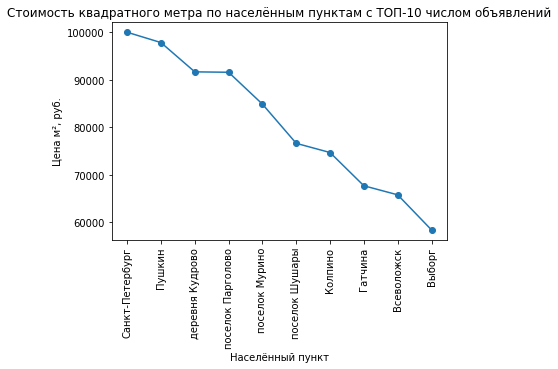

In [35]:
# Выведем на экран полученный результат в виде таблицы
# Cоздадим список из top_locality и отфильтруем data с помощью метода .isin(), передав в него этот список)

top_locality = data.groupby('locality_name')['total_area'].count().sort_values(ascending=False).head(10).index

apartments_locality = data.loc[data['locality_name'].isin((top_locality)) == True]

locality_pivot = (apartments_locality
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc='median')
    .sort_values(by='square_meter_price', ascending=False)
    .reset_index()
)

fig, ax = plt.subplots()
ax.set(title = 'Стоимость квадратного метра по населённым пунктам с ТОП-10 числом объявлений',
       xlabel='Населённый пункт',
       ylabel='Цена м², руб.')
ax.plot(locality_pivot['locality_name'], locality_pivot['square_meter_price'], 'o-')
plt.xticks(rotation='vertical')
plt.show()

#### Выводы о средней цене квадратного метра в 10 населённых пунктах с наибольшим числом объявлений¶
По количеству объявлений Санкт-Петербург значительно опережает своих соседей "конкурентов", также как и по средней цене за квадратный метр, Пушкин не далеко отстает по средней цене, так как у него есть несколько конкурентных преимуществ - шикарное местоположение, богатый архитектурный ансамбль, спокойствие от столичной суеты. Самая низкая из представленных цен зафиксирована в Выборге, что и не удивительно, расстояние до центра Санкт-Петербурга из этого города будет самым большим.




### Задача 4. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра

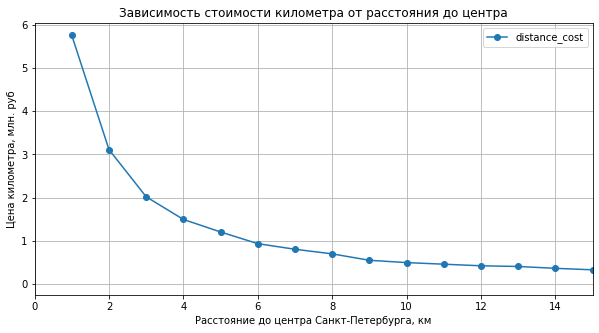

In [36]:
# Используем ранее добавленный столбец с расстоянием до центра города в километрах - city_center_distance
# Добавим столбец стоимости километра до центра - distance_cost
# Выделите квартиры в Санкт-Петербурге внутри кода для построения графика

data['distance_cost'] = data['last_price']/data['city_center_distance']

(data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_distance', values='distance_cost')
    .plot(style='o-', grid=True, xlim=(0,15), figsize=(10, 5))
)
plt.title('Зависимость стоимости километра от расстояния до центра')
plt.xlabel('Расстояние до центра Санкт-Петербурга, км')
plt.ylabel('Цена километра, млн. руб')
plt.show()

#### Выводы о средней цене каждого километра, как стоимость объектов зависит от расстояния до центра города
По полученным данным, можно сделать вывод, что центральным районом считается расстояние до 8 километров от центра. После этой отсечки цена практически не меняется и продолжается ровной линией. "Золотым" можно назвать расстояние до 3 километров от центра города, цена в этом месте значительно выше. 




### Общий вывод

Для Санкт-Петербурга и Ленинградской области характерны следущие объявления о продаже квартир за 2014-2019 годы:
К продаже предлагается **2-х** комнатная квартира, **55 м²**, жилая площадь - **30 м²**, площадь кухни - **9 м²**, потолок - **2,38 м**, **не первый не последний этаж**, в районе **5** этажа, в **11-этажном** доме за **4.7** млн. руб, **15 км** до центра, **29** километров до аэропорта, парк в **500** метрах, объявление опубликовано в **четверг** в **феврале**.

Чаще всего квартиру продают за **92** дня. Если меньше **45** дней, то это считается быстрой продажей, если дольше **260** дней - это необычно долго.

Среди факторов от которых зависит цена выделяют

- общая площадь - коэффициент корреляции положительный 0,98;
- жилая площадь - коэффициент корреляции положительный 0,97;
- площадь кухни  - коэффициент корреляции положительный 0,88;
- количество комнат - коэффициент корреляции положительный 0,36;
- день размещения - коэффициент корреляции положительный 0,31.


Чем **больше площадь, тем выше стоимость**, а квартиры на **первом этаже** оценивается дешевле остальных вариантов. 

Самые дорогие локации в Санкт-Петербурга и Ленинградской области
Санкт-Петербург - **98444** руб/м²
Пушкин - **97175** руб/м²
деревня Кудрово - **92143** руб/м²

Дешевле всего квадратный метр в Выборге - **58497** руб/м²

В районе **3 километров** от центра города Санкт-Петербург находится самая дорогая недвижимость. Средняя цена километра составляет **4 млн. руб.**


### Бонус

In [37]:
# check
import seaborn as sns

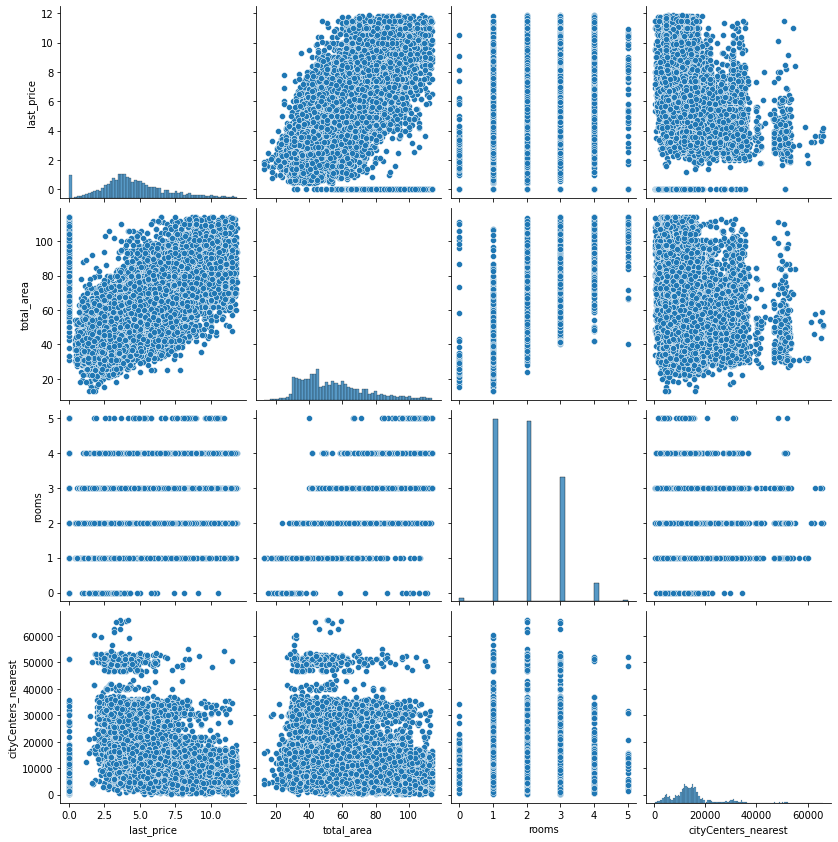

In [38]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


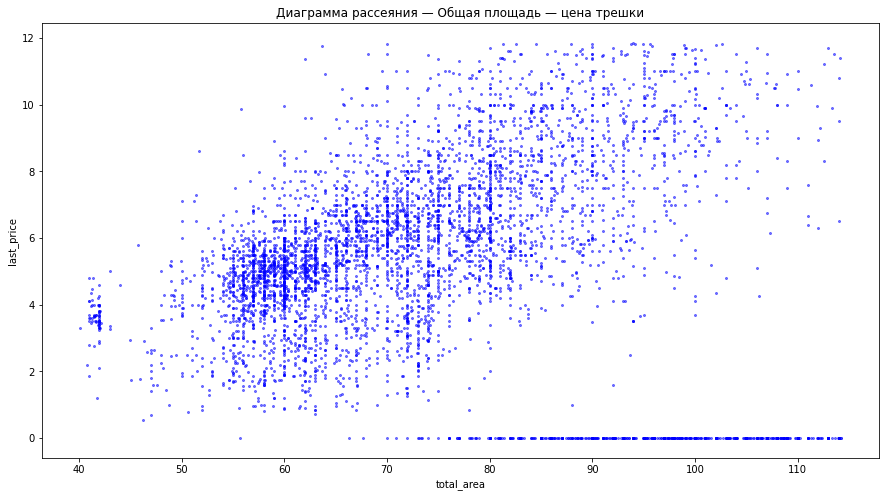

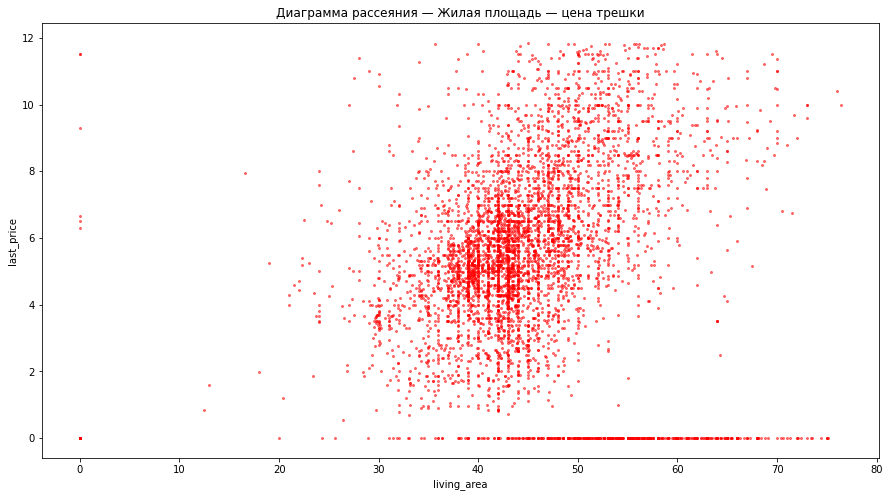

In [39]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод